In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve,accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [4]:
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
gradeof software,19,17,16,17,16
grade of questionnaire score(EQ),5,4,3,4,4


In [5]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [6]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [9]:
X = df.drop("target", axis = 1)
y = df["target"]

In [10]:
X.shape

(100, 3)

In [11]:
y.shape

(100,)

In [12]:
X.head()

,education,gender,EQ
0,1,1,148
1,1,1,131
2,1,1,126
3,1,1,135
4,1,1,132


___
## Decision-Tree Classifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [14]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
print('The accuracy of the DT classifier is {:.2f} on training data'.format(model.score(X_train, y_train)))
print('The accuracy of the DT classifier is {:.2f} on test data'.format(model.score(X_test, y_test)))

The accuracy of the DT classifier is 1.00 on training data
The accuracy of the DT classifier is 1.00 on test data


In [18]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
1.0


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Text(0.5,15,'Predicted label')

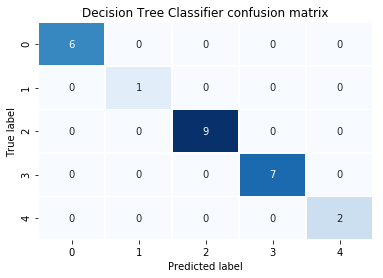

In [25]:
cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None, cmap="Blues")
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

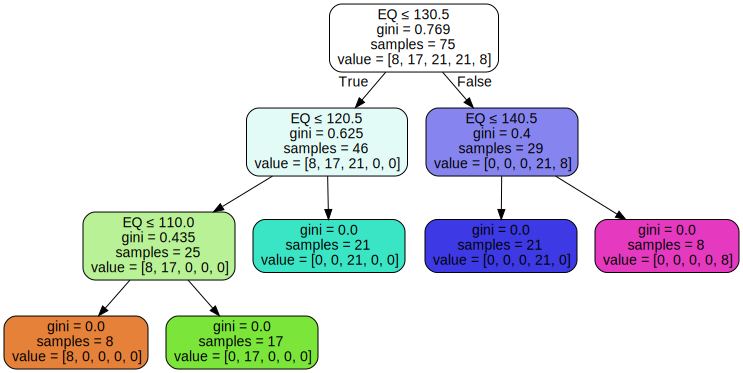

In [22]:
# conda install python-graphviz
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render("DT")
graph